In [2]:
%load_ext autoreload
%autoreload
%matplotlib widget

import cProfile
import util


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%autoreload

DATA_LOCATION = "D:/thesis_data/1hour_complete_22_01_10_05/"
#DATA_LOCATION = "../raw_data/1hour/"

#cProfile.run("util.read_data(DATA_LOCATION)")
util.init_db()
util.read_data(DATA_LOCATION)

  0%|          | 0/200 [00:00<?, ?it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
27644 27644


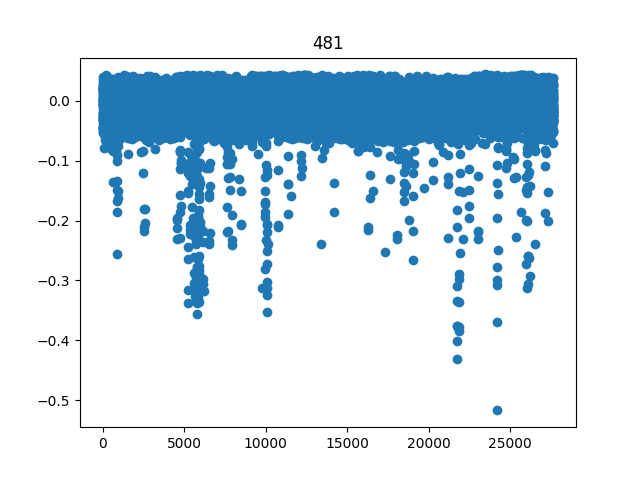

In [38]:
%load_ext autoreload
%autoreload
%matplotlib widget

import util
util.visualize_timedrift()

In [3]:
%load_ext autoreload
%autoreload

import util
util.cleanup_sensors()
util.cleanup_messages()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Sensors with < 2 records: 0
Deleting 0 messages


In [52]:
%load_ext autoreload
%autoreload

import timedelta_utils
from pstats import Stats

timedelta_utils.calc_timedeltas()
timedelta_utils.propagate_timedeltas()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/114 [00:00<?, ?it/s]

Doing Floyd's algorithm


  0%|          | 0/114 [00:00<?, ?it/s]

In [53]:
%load_ext autoreload
%autoreload
timedelta_utils.timedelta_statistics()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
n sensors: 114
connected sensor pairs: 4580 / 12882 (35%)
Mean mean: 192.89794756390455
Mean variance: 3.0536272719433015e-05
Max variance: 0.00938011325416321 sensors: (231, 3948331, -0.019756751567068825, 0.00938011325416321)


ValueError: not enough values to unpack (expected 4, got 0)

In [80]:
# test box for mlat

%load_ext autoreload
%autoreload
%matplotlib widget

import mlat_utils
from util import GeoPoint
from collections import defaultdict

C = 299792458
sensor_ids = list(range(4))
sensor_locations = {
    0: GeoPoint('ecef', C+7, 0, 6),
    1: GeoPoint('ecef', 19, C-12, 0),
    2: GeoPoint('ecef', 15, 47, C),
    3: GeoPoint('ecef', C, -C, 1),
    4: GeoPoint('ecef', C+10, 20, -30),
    5: GeoPoint('ecef', 0, 0, 0)
}

sensor_timestamps = {
    0: 1,
    1: 1,
    2: 1,
    3: 2**0.5,
    4: 1,
    5: 0
}

time_deltas = {i: {j: (0, 0) for j in sensor_ids} for i in sensor_ids}

pos = mlat_utils.calc_mlat(sensor_ids, sensor_locations, sensor_timestamps, time_deltas, debug=True)
print(pos.pos() if pos else "None")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
N Sensors: 6
Initial sensor subset: [0, 1, 2, 3, 4, 5]
Using 6 / 6 sensors for MLAT
[0, 1, 2, 3, 4, 5]
sensors center point: [ 1.49896234e+08 -6.00000000e+00  1.49896214e+08]
centered sensor locations: [array([ 1.49896231e+08,  6.00000000e+00, -1.49896208e+08]), array([-1.49896215e+08,  2.99792452e+08, -1.49896214e+08]), array([-1.49896219e+08,  5.30000000e+01,  1.49896244e+08]), array([ 1.49896224e+08, -2.99792452e+08, -1.49896213e+08]), array([ 1.49896234e+08,  2.60000000e+01, -1.49896244e+08]), array([-1.49896234e+08,  6.00000000e+00, -1.49896214e+08])]
corrected timestamps: [0, 0, 0, 0.41421356237309515, 0, -1]
(18.755930334329605, 0.7395239174365997, 7.772336363792419)


In [59]:
%load_ext autoreload
%autoreload
%matplotlib widget
import cProfile
import mlat_utils
from pstats import Stats

#pr = cProfile.Profile()
#pr.enable()

mlat_utils.calc_positions(variance_cutoff=1e-10)

#pr.disable()
#stats = Stats(pr)
#stats.sort_stats('tottime').print_stats(25)

# Check calculated position quality
mlat_utils.summarize_accuracy('raw')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/785092 [00:00<?, ?it/s]

Number of received messages: (1372691,)
Number of calculated positions: (11991,)
Best dist: 34578.013953979826
Worst dist: 87028292.95146379
Mean dist: 985766.857906134
Median dist: 452893.84543543024


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
N messages: 961
N messages: 193
N messages: 767
N messages: 384
N messages: 503


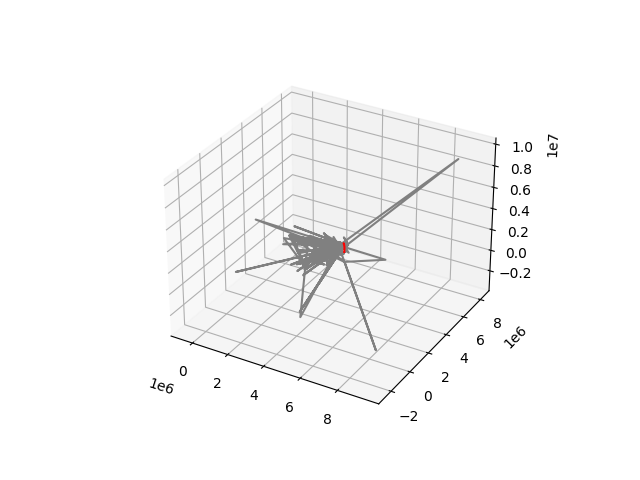

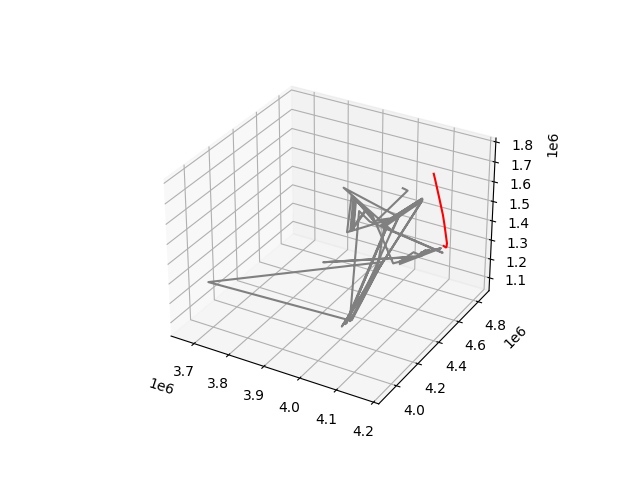

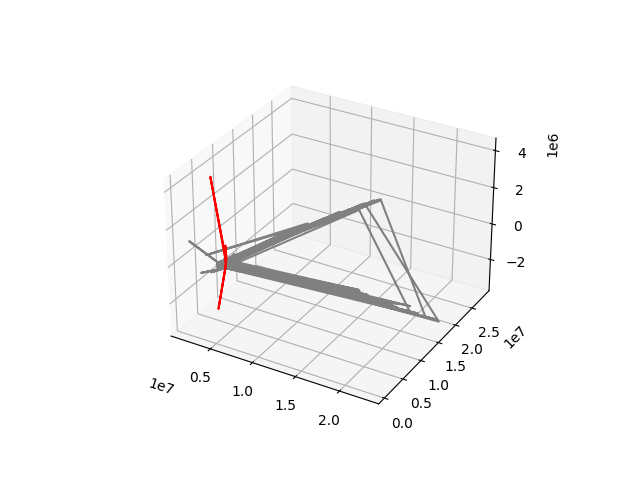

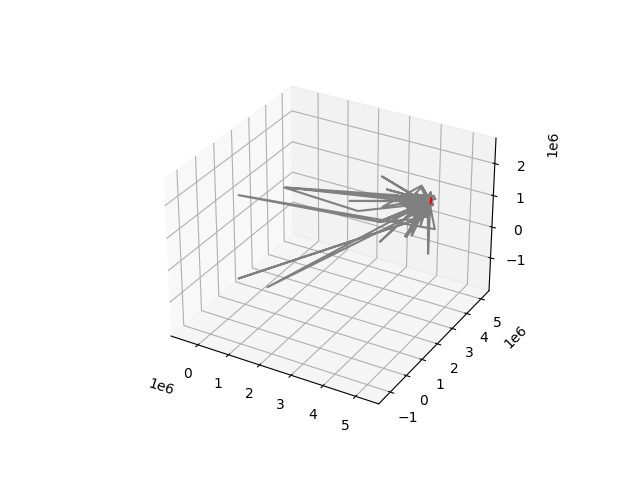

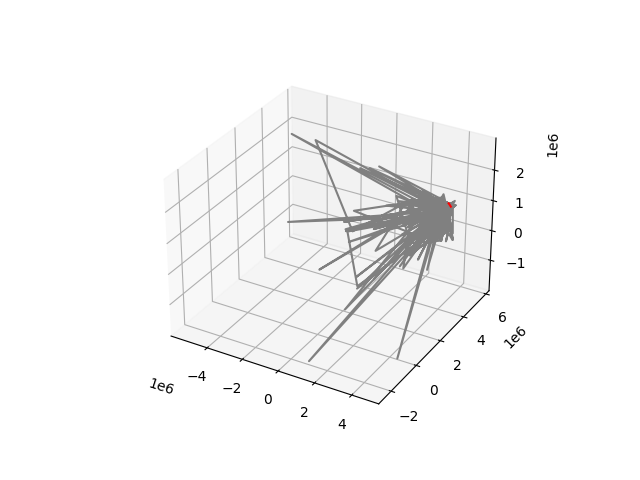

In [50]:
# check the results visually

import mlat_utils
%load_ext autoreload
%autoreload
%matplotlib widget
mlat_utils.visualize_flight_paths('raw')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/428 [00:00<?, ?it/s]

Removed 383 / 2291 positions
Removed 2 / 69 positions
Removed 201 / 417 positions
Removed 644 / 1702 positions
Removed 118 / 690 positions
Removed 789 / 2008 positions
Removed 867 / 3745 positions
Removed 0 / 167 positions
Removed 321 / 2228 positions
Removed 36 / 137 positions
Removed 606 / 1482 positions
Removed 75 / 166 positions
Removed 191 / 1662 positions
Removed 0 / 3 positions
Removed 79 / 398 positions
Removed 159 / 1073 positions
Removed 0 / 58 positions
Removed 14 / 171 positions
Removed 109 / 454 positions
Removed 152 / 465 positions
Removed 119 / 370 positions
Removed 0 / 40 positions
Removed 0 / 2 positions
Removed 337 / 1067 positions
Removed 167 / 1003 positions
Removed 1 / 225 positions
Removed 297 / 1655 positions
Removed 4 / 164 positions
Removed 1 / 1 positions
Removed 0 / 31 positions
Removed 545 / 1320 positions
Removed 4 / 9 positions
Removed 382 / 1091 positions
Removed 56 / 357 positions
Removed 188 / 1260 positions
Removed 51 / 216 positions
Removed 3 / 57 pos

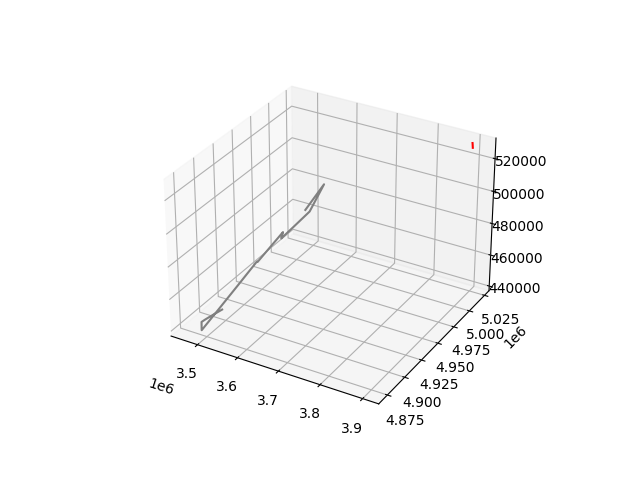

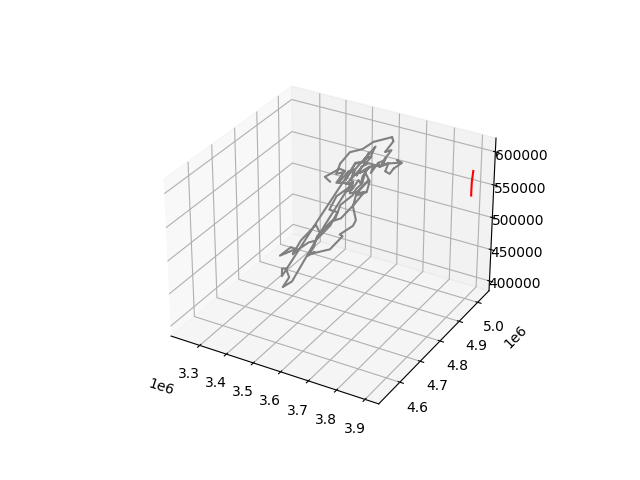

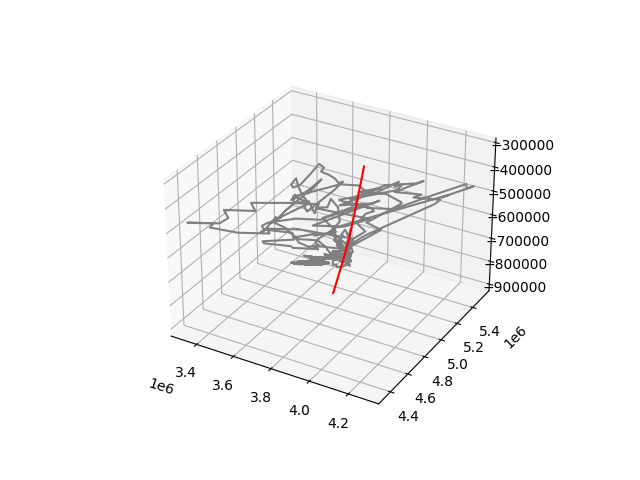

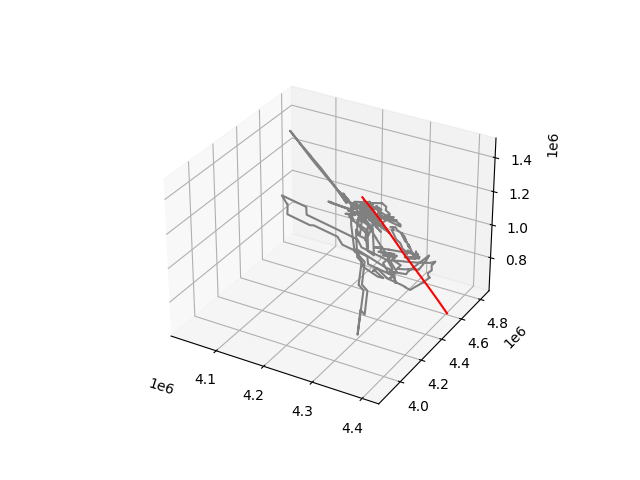

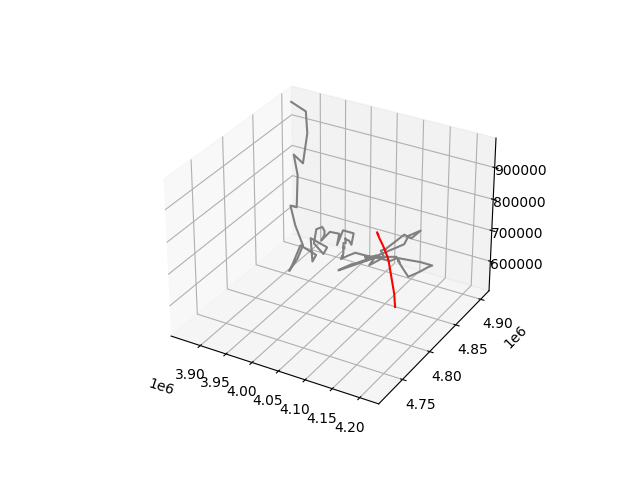

In [51]:
# do contextual adjustments to calculated positions
import mlat_utils
%load_ext autoreload
%autoreload
%matplotlib widget
mlat_utils.post_process_positions()
mlat_utils.visualize_flight_paths('corrected')
mlat_utils.summarize_accuracy('corrected')

In [11]:
util.close_db()